# Monitoring

## import packages

In [23]:
import os
import sys
from dotenv import load_dotenv

# Définition du chemin racine du projet
root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_path not in sys.path:
    sys.path.append(root_path)

# Chargement des variables d'environnement depuis le fichier .env.dev à la racine
dotenv_path = os.path.join(root_path, ".env.dev")
load_dotenv(dotenv_path)

from src.api.database.database import SessionLocal
from src.api.database.table_models import PredictionLog
import pandas as pd
import seaborn as sns

In [24]:
db = SessionLocal()

In [25]:
try:
    logs = db.query(PredictionLog).all()
    data = []

    for log in logs:
        row = {'latency':log.latency_ms,'status_code':log.status_code}
        data.append(row)

    df = pd.DataFrame(data)

finally:
    db.close()

print(f"Extraction terminé : {len(df)} lignes récupérées")

Extraction terminé : 1307 lignes récupérées


In [26]:
df.describe(include='all')

,latency,status_code
count,1307.000000,1307.0
mean,28.898151,200.0
std,12.509211,0.0
min,0.230074,200.0
25%,16.048193,200.0
50%,31.570196,200.0
75%,37.864685,200.0
max,135.711908,200.0


<Axes: xlabel='latency', ylabel='Count'>

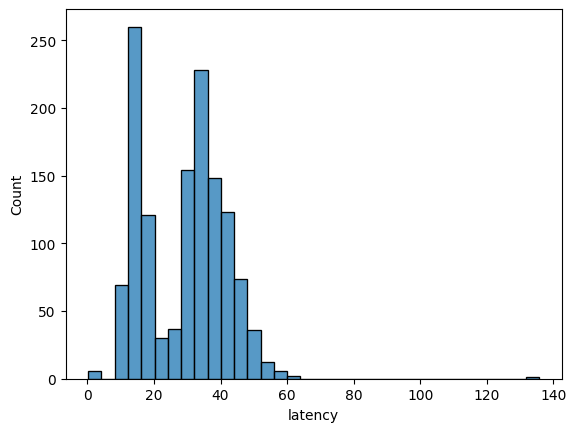

In [28]:
sns.histplot(df['latency'])